In [29]:
import pandas as pd
import seaborn as sns

In [21]:
#1 Encode datasets

raw = pd.read_csv("dataset/adjusted.csv")
raw.shape

(38, 12)

In [22]:
raw.columns

Index(['timestamp', 'age', 'sex', 'occupation', 'must_use_phone',
       'screen_time', 'sleep_time', 'is_smoker', 'is_alcoholics',
       'is_consuming_special_medicine', 'is_screen_time_distract_sleep',
       'difference_before_pandemic'],
      dtype='object')

In [23]:
# Demography of the respondents

raw[["sex", "age"]].groupby("sex").count()

,age
sex,
Pria,27
Wanita,11


In [24]:
# Screen time description

raw[["screen_time", "sleep_time"]].describe()

,screen_time,sleep_time
count,38,38
unique,5,2
top,6 - 8 jam sehari,6 - 8 jam sehari
freq,14,25


In [26]:
raw[["screen_time", "sleep_time"]].groupby("sleep_time").describe()

screen_time                              
                       count unique               top freq
sleep_time                                                
3 - 5 jam sehari          13      5  6 - 8 jam sehari    6
6 - 8 jam sehari          25      4  3 - 5 jam sehari   10

In [28]:
raw[["occupation", "sleep_time"]].groupby("occupation").describe()

sleep_time                              
                             count unique               top freq
occupation                                                      
Mahasiswa                        5      2  6 - 8 jam sehari    3
Media Massa                      2      2  6 - 8 jam sehari    1
Otomasi industri                 1      1  6 - 8 jam sehari    1
Pendidikan                       3      2  6 - 8 jam sehari    2
Perbankan                        3      1  6 - 8 jam sehari    3
Seni Kreatif dan Desain          4      2  3 - 5 jam sehari    3
Teknologi Informasi             19      2  6 - 8 jam sehari   13
Telekomunikasi                   1      1  6 - 8 jam sehari    1

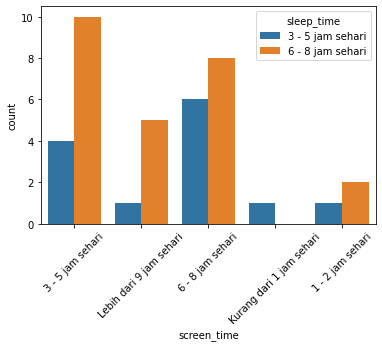

In [36]:
# scatter plot occupation, sleep time, and screen time
count_plot = sns.countplot(data=raw, x="screen_time", hue="sleep_time")
for item in count_plot.get_xticklabels():
    item.set_rotation(45)